In [1]:
import numpy as np
import os
import csv
import math

In [2]:
mlp_prob_filepath = "X-rAI/mlp_vit_prob.csv"
neuraltree_prob_filepath = "X-rAI/neuraltree_vit_prob.csv"

tabular_prob_filepath = "tabular_prob.csv"

In [3]:
# Read the probability into list
mlp_prob = []
with open(mlp_prob_filepath, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        mlp_prob.append([float(item) for item in row])
        
mlp_prob = [item for nestedlist in mlp_prob for item in nestedlist]

neuraltree_prob = []
with open(neuraltree_prob_filepath, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        neuraltree_prob.append([float(item) for item in row])

neuraltree_prob = [item for nestedlist in neuraltree_prob for item in nestedlist]
        
tabular_prob = []
with open(tabular_prob_filepath, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        tabular_prob.append([float(item) for item in row])
tabular_prob = [item for nestedlist in tabular_prob for item in nestedlist]

In [4]:
test_labels_filepath = "test_labels.csv"
labels = []
with open(test_labels_filepath, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        labels.append([float(item) for item in row])
labels = [item for nestedlist in labels for item in nestedlist]

In [5]:
avg_prob_neuraltree = []

for i in range(len(neuraltree_prob)):
    avg_prob_neuraltree.append((neuraltree_prob[i] + tabular_prob[i]) / 2)
    
avg_prob_mlp = []
for i in range(len(mlp_prob)):
    avg_prob_mlp.append((mlp_prob[i] + tabular_prob[i]) / 2)

In [6]:
# Now we will use ROC Curve to determine the best threshold
!pip install numpy matplotlib scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [7]:
fpr, tpr, thresholds = roc_curve(labels, avg_prob_mlp)
roc_auc = auc(fpr, tpr)

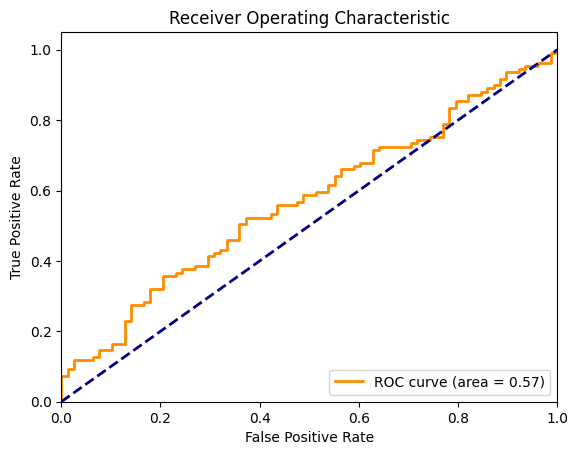

In [8]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
optimal_idx = np.argmin(np.sqrt(np.square(1-tpr) + np.square(fpr)))
threshold = thresholds[optimal_idx]

final_prediction = []
for i in range(len(labels)):
    if avg_prob_mlp[i] > threshold:
        final_prediction.append(1.0)
    else:
        final_prediction.append(0.0)
count = sum(1 for i, j in zip(final_prediction, labels) if i == j)
accuracy = count / len(labels)
print(accuracy)
print(threshold)

0.5614973262032086
0.465701736993436


In [11]:
fpr, tpr, thresholds = roc_curve(labels, avg_prob_neuraltree)
roc_auc = auc(fpr, tpr)

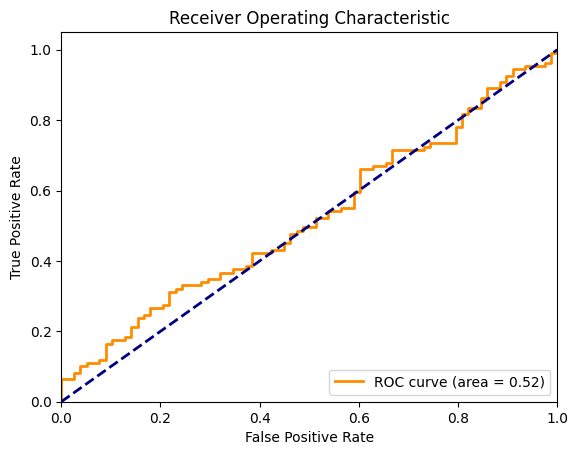

In [12]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
optimal_idx = np.argmin(np.sqrt(np.square(1-tpr) + np.square(fpr)))
threshold = thresholds[optimal_idx]

final_prediction = []
for i in range(len(labels)):
    if avg_prob_neuraltree[i] > threshold:
        final_prediction.append(1.0)
    else:
        final_prediction.append(0.0)
count = sum(1 for i, j in zip(final_prediction, labels) if i == j)
accuracy = count / len(labels)
print(accuracy)
print(threshold)

0.5454545454545454
0.35515485
